# Chapter 2. Python Language Basics, IPython, and Jupyter Notebooks

In [1]:
b = [1, 2, 3]

In [2]:
b?

In [3]:
print?

In [4]:
def add_numbers(a, b):
    """
    Add two numbers together

    Returns
    -------
    the_sum : type of arguments
    """
    return a + b

In [5]:
# Show docstring
add_numbers?

In [6]:
# Show source code
add_numbers??

In [7]:
%run test.py

hello from test.py


In [8]:
# %load test.py
print('hello from test.py')


hello from test.py


In [9]:
# run multiple
%timeit 10 * 10

16.3 ns ± 0.214 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [19]:
# run once
%time 10 * 10

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


100

In [10]:
%debug?

In [11]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [13]:
%pwd

'/Users/hugh/projects/notebook-driven-learning'

In [16]:
%quickref

In [17]:
%magic

In [ ]:
a = 1

In [18]:
%page dict

In [20]:
%who

add_numbers	 b	 


In [21]:
%who_ls

['add_numbers', 'b']

In [22]:
%whos

Variable      Type        Data/Info
-----------------------------------
add_numbers   function    <function add_numbers at 0x7fe1f616b0d0>
b             list        n=3


### Matplotlib integration

In [23]:
# In the IPython shell, running %matplotlib sets up the integration 
# so you can create multiple plot windows 
# without interfering with the console session:
%matplotlib

Using matplotlib backend: TkAgg


In [24]:
# In Jupyter, the command is a little different
%matplotlib inline

## Python Basic

In [25]:
isinstance(1, (int, float))

True

In [26]:
isinstance('a', (int, float))

False

In [27]:
isinstance('a', (int, str))

True

In [28]:
a = 'foo'

In [29]:
getattr(a, 'split')

<function str.split>

In [30]:
hasattr(a, 'split')

True

In [33]:
# duck typing
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: # not iterable
        return False

In [34]:
isiterable('str')

True

In [35]:
isiterable(1)

False

In [36]:
a = [1, 2, 3]
b = a
c = [1, 2, 3]

In [37]:
a is b

True

In [38]:
a is c

False

In [39]:
a == c

True

In [40]:
0b010 & 0b110

2

In [41]:
True & True

True

### String

In [42]:
print('a\nb')

a
b


In [43]:
# r(raw): interpret as is
print(r'a\nb')

a\nb


In [46]:
# f: float
# s: str
# d: integer
template = '{0:.2f} {1:s} are worth US${2:d}'
template.format(4.5560, 'Argentine Pesos', 1)

'4.56 Argentine Pesos are worth US$1'

# Chapter 4. NumPy Basics: Arrays and Vectorized Computation

In [3]:
import numpy as np

### Performance

In [48]:
np_arr = np.arange(1000000)

In [49]:
%time for _ in range(10): np_arr = np_arr * 2

CPU times: user 12.2 ms, sys: 5.05 ms, total: 17.3 ms
Wall time: 21.1 ms


In [52]:
%time np_arr.sum()

CPU times: user 1.51 ms, sys: 2.28 ms, total: 3.79 ms
Wall time: 6.4 ms


511999488000000

In [50]:
py_arr = range(1000000)

In [51]:
%time for _ in range(10): py_arr = (2 * n for n in py_arr)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 15 µs


In [53]:
%time sum(py_arr)

CPU times: user 928 ms, sys: 5.59 ms, total: 934 ms
Wall time: 936 ms


511999488000000

### Data Types for ndarrays

In [54]:
np.array_equal(np.array([1,2], dtype=np.int32), [1,2])

True

In [55]:
np.array_equal(np.array([1,2], dtype=np.float64), [1,2])

True

In [56]:
np.array_equal(np.array([1,2], dtype=np.object), [1,2])

True

In [57]:
np.array_equal(np.array([1,2], dtype=object), [1,2])

True

In [58]:
np.array_equal(np.array([1,2], dtype=object), np.array([1,2], dtype=np.int32))

True

### Indexing and Slicing

In [66]:
np_arr = np.arange(10)
print(np_arr)

[0 1 2 3 4 5 6 7 8 9]


In [67]:
part = np_arr[0:2]
print(part)
part[0] = 100
print(part)

[0 1]
[100   1]


In [68]:
print(np_arr)

[100   1   2   3   4   5   6   7   8   9]


In [69]:
arr = list(range(10))
print(arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [70]:
part = arr[0:2]
part[0] = 100
print(part)

[100, 1]


In [71]:
print(arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Fancy indexing

In [4]:
arr = np.arange(32).reshape(8, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [5]:
arr[[2, 3, 4]][:, [3, 2, 1]]

array([[11, 10,  9],
       [15, 14, 13],
       [19, 18, 17]])

In [6]:
arr[[2, 3, 4]]

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

### Transposing Arrays and Swapping Axes

In [18]:
arr = np.arange(24).reshape(2, 3, 4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [19]:
a102 = arr.transpose((1, 0, 2))
a102

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [20]:
a120 = arr.transpose((1, 2, 0))

In [22]:
print(arr[0, 1, 2])
print(a102[1, 0, 2])

6
6


In [23]:
arr.swapaxes(0, 1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

## 4.3 Array-Oriented Programming with Arrays

In [46]:
arr = np.arange(-5, 5, 0.01)

xs, ys = np.meshgrid(arr, arr)

In [47]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [48]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

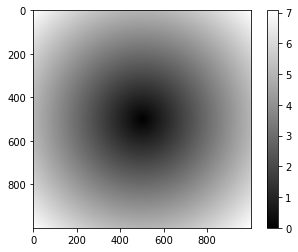

In [49]:
import matplotlib.pyplot as plt

z = np.sqrt(xs ** 2 + ys ** 2)
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

In [33]:
arr2 = np.arange(10, 20)
xs2, ys2 = np.meshgrid(arr, arr2)

In [34]:
xs2

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [35]:
ys2

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
       [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
       [18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
       [19, 19, 19, 19, 19, 19, 19, 19, 19, 19]])

In [36]:
z2 = np.sqrt(xs2 ** 2 + ys2 ** 2)
z2

array([[10.        , 10.04987562, 10.19803903, 10.44030651, 10.77032961,
        11.18033989, 11.66190379, 12.20655562, 12.80624847, 13.45362405],
       [11.        , 11.04536102, 11.18033989, 11.40175425, 11.70469991,
        12.08304597, 12.52996409, 13.03840481, 13.60147051, 14.2126704 ],
       [12.        , 12.04159458, 12.16552506, 12.36931688, 12.64911064,
        13.        , 13.41640786, 13.89244399, 14.4222051 , 15.        ],
       [13.        , 13.03840481, 13.15294644, 13.34166406, 13.60147051,
        13.92838828, 14.31782106, 14.76482306, 15.26433752, 15.8113883 ],
       [14.        , 14.03566885, 14.14213562, 14.31782106, 14.56021978,
        14.86606875, 15.23154621, 15.65247584, 16.1245155 , 16.64331698],
       [15.        , 15.03329638, 15.13274595, 15.29705854, 15.5241747 ,
        15.8113883 , 16.15549442, 16.55294536, 17.        , 17.49285568],
       [16.        , 16.03121954, 16.1245155 , 16.2788206 , 16.4924225 ,
        16.76305461, 17.08800749, 17.4642492 

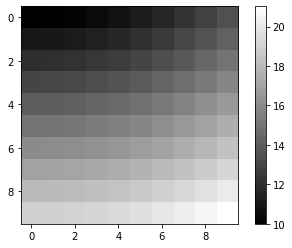

In [37]:
import matplotlib.pyplot as plt

plt.imshow(z2, cmap=plt.cm.gray); plt.colorbar()


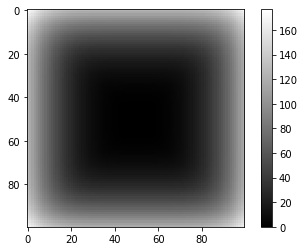

In [60]:
arr3 = np.arange(-5, 5, 0.1)

xs3, ys3 = np.meshgrid(arr3, arr3)
zz3 = xs3 ** 6 + ys3 ** 6
# zz3 = zz3 + -np.min(zz3)
z3 = np.sqrt(zz3)

plt.imshow(z3, cmap=plt.cm.gray); plt.colorbar()

### Mathematical and Statistical Methods

In [62]:
arr = np.random.randn(10)
arr

array([ 0.10147232, -0.67730863,  0.95568244,  2.79566056, -1.13865174,
        0.07063532,  0.08304279, -0.55857215, -0.21608659,  0.22898968])

In [63]:
arr.cumsum()

array([ 0.10147232, -0.57583631,  0.37984613,  3.17550669,  2.03685495,
        2.10749026,  2.19053306,  1.63196091,  1.41587432,  1.644864  ])

In [65]:
arr = np.ones((3, 3))
arr

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [66]:
arr.cumsum()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [67]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [68]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66])

In [69]:
arr.cumsum(axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21]])

### Method for Boolean arrays

In [70]:
arr = np.arange(10)
(arr > 5).sum()

4

### Sorting

In [74]:
arr = np.random.randn(3, 4)  # WTF - why it doesn't take a tuple like ones()
arr

array([[ 1.33523635, -2.36772459, -0.09942249,  0.2942877 ],
       [-0.28607683,  0.4533436 , -1.94538772,  0.56719165],
       [-1.22286751, -1.37156314,  1.16266635, -0.88298843]])

In [76]:
arr.sort(axis=1) # in-place sorting
arr 

array([[-2.36772459, -0.09942249,  0.2942877 ,  1.33523635],
       [-1.94538772, -0.28607683,  0.4533436 ,  0.56719165],
       [-1.37156314, -1.22286751, -0.88298843,  1.16266635]])

### Unique and Other Set Logic

In [78]:
np.unique([3, 3, 2, 2, 1, 1]) # returns sorted set

array([1, 2, 3])

In [79]:
np.in1d([1, 2, 3], [1, 3])

array([ True, False,  True])